# Module 5 - Modern Portfolio Theory

   ### Welcome to the Answer notebook for Module 5 ! 
Make sure that you've submitted the module 4 notebook and unlocked Module 5 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Query 5.1 
5.1 For your chosen stock, calculate the mean daily return and daily standard deviation of returns, and then just annualise them to get mean expected annual return and volatility of that single stock. **( annual mean = daily mean * 252 , annual stdev = daily stdev * sqrt(252) )**

In [2]:
print('I have found the solutions by considering each year values as different entities. Also i have solved atlast once again considering whole dataset as one')
df = pd.read_csv('PNB.csv')
df['year'] = pd.DatetimeIndex(df['Date']).year     #creating year and month column
df['month'] = pd.DatetimeIndex(df['Date']).month
df['daily_return']=df['Close Price'].pct_change()*100
df.fillna(0,inplace = True)

mean_daily2 = df['daily_return'].groupby([df['year']]).mean()
std_daily2 = df['daily_return'].groupby([df['year']]).std()
mean_annual2 = mean_daily2*252
std_annual2 = std_daily2*(252**(1/2))
print(f'''Annual returns 
{mean_annual2}''' )
print(f'''Annual volatility 
{std_annual2}''')


I have found the solutions by considering each year values as different entities. Also i have solved atlast once again considering whole dataset as one
Annual returns 
year
2017    24.243214
2018   -68.494044
2019    13.376037
Name: daily_return, dtype: float64
Annual volatility 
year
2017    69.170385
2018    48.406263
2019    38.365354
Name: daily_return, dtype: float64


Query 5.2

Now, we need to diversify our portfolio. Build your own portfolio by choosing any 5 stocks, preferably of different sectors and different caps. Assume that all 5 have the same weightage, i.e. 20% . Now calculate the annual returns and volatility of the entire portfolio ( Hint : Don't forget to use the covariance )

In [3]:
df1=pd.read_csv('BAJFINANCE.csv')     #Reading the dataframes of 5 different stocks
df2=pd.read_csv('CIPLA.csv')
df3=pd.read_csv('HEROMOTOCO.csv')
df4=pd.read_csv('RELIANCE.csv')
df5=pd.read_csv('SUNPHARMA.csv')

y = list()


def delete_row(cell,k):               #function to delete rows having series other than 'EQ'
    for x in k.index:
         if k.at[x,"Series"]=="EQ":
                continue
         else:
            y.append(int(x))
    return(y)

df1 = pd.read_csv('BAJFINANCE.csv',skiprows = delete_row(None,df1))    #deleting rows not containing 'EQ'
df2 = pd.read_csv('CIPLA.csv',skiprows = delete_row(None,df2))    
df3 = pd.read_csv('HEROMOTOCO.csv',skiprows = delete_row(None,df3))    
df4 = pd.read_csv('RELIANCE.csv',skiprows = delete_row(None,df4))    
df5 = pd.read_csv('SUNPHARMA.csv',skiprows = delete_row(None,df5))    

close_price_dataframe=pd.DataFrame({'BAJFINANCE':df1['Close Price'],
                                   'CIPLA':df2['Close Price'],
                                   'HEROMOTOCO':df3['Close Price'],
                                   'RELIANCE':df4['Close Price'],
                                   'SUNPHARMA':df5['Close Price']}) #creating the new dataframe containing close price
p_l_c_dataframe=close_price_dataframe                               #creating duplicate dataframe
p_l_c_dataframe.set_index(df1.Date,inplace=True)                    #setting Date as index
p_l_c_dataframe=p_l_c_dataframe.pct_change()*100                    #calculating percentage change
p_l_c_dataframe.fillna(0,inplace = True)
p_l_c_dataframe['year'] = pd.DatetimeIndex(df['Date']).year     #creating year column

weights = np.asarray([0.2,0.2,0.2,0.2,0.2])
weights_transpose = weights.reshape((5,1))

mean_daily = p_l_c_dataframe.groupby('year').mean()
cov_daily = p_l_c_dataframe.groupby('year').cov()

mean_annual = (mean_daily * weights *252).sum(axis =1).values

x = cov_daily.values
j = 0

volatility = []
for i in range(0,3):
    i = int(i)
    y[i] = x[j:j+5]
    volatility.append((np.dot(weights,np.dot(y[i],weights_transpose ) )*252)**(1/2))
    j+=5
    
volatility = np.array(volatility).reshape((1,3))
mean_annual = np.array(mean_annual)
years = 2017

for i in range(0,3):
    print(f'The Mean annual return and volatiiity of year {years+i} is {mean_annual[i]} and {volatility[0,i]}')



The Mean annual return and volatiiity of year 2017 is 6.714315311613306 and 18.879905357694867
The Mean annual return and volatiiity of year 2018 is 3.9258856482232307 and 18.864106328366933
The Mean annual return and volatiiity of year 2019 is 1.223568729162558 and 15.170211994349906


Query 5.3 and 5.4

Prepare a scatter plot for differing weights of the individual stocks in the portfolio , the axes being the returns and volatility. Colour the data points based on the Sharpe Ratio ( Returns/Volatility) of that particular portfolio.

Mark the 2 portfolios where -
Portfolio 1 - The Sharpe ratio is the highest
Portfolio 2 - The volatility is the lowest. 


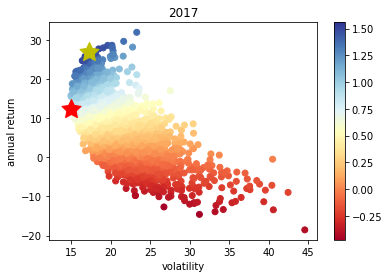

In [4]:
num_portfolios = 2500

portfolio_return = np.zeros((num_portfolios,3))
portfolio_volatility = np.zeros((num_portfolios,3))

for i in range(num_portfolios):
    
    weights = np.random.random(5)
    weights /= np.sum(weights)
    weights_transpose = weights.reshape((5,1))
    
    portfolio_return[i] = (mean_daily * weights *252).sum(axis =1).values
    
    j = 0

    volatility = np.zeros((3,1))
    for ik in range(0,3):
        ik = int(ik)
        y[ik] = x[j:j+5]
        volatility[ik] = (np.dot(weights,np.dot(y[ik],weights_transpose ) )*252)**(1/2)
        j+=5
    
    portfolio_volatility[i] = np.array(volatility).reshape((1,3))
    
sharp = portfolio_return/portfolio_volatility

portfolio_return_2017 = portfolio_return[:,0]
portfolio_return_2018 = portfolio_return[:,1]
portfolio_return_2019 = portfolio_return[:,2]

portfolio_std_2017 = portfolio_volatility[:,0]
portfolio_std_2018 = portfolio_volatility[:,1]
portfolio_std_2019 = portfolio_volatility[:,2]

sharp_2017 = sharp[:,0]
sharp_2018 = sharp[:,1]
sharp_2019 = sharp[:,2]

portfolio_2017 = pd.DataFrame({'ret':portfolio_return_2017,'std':portfolio_std_2017,'sharp':sharp_2017})
portfolio_2018 = pd.DataFrame({'ret':portfolio_return_2018,'std':portfolio_std_2018,'sharp':sharp_2018})
portfolio_2019 = pd.DataFrame({'ret':portfolio_return_2019,'std':portfolio_std_2019,'sharp':sharp_2019})

plt.scatter(portfolio_2017['std'],portfolio_2017['ret'],c=portfolio_2017['sharp'],cmap='RdYlBu')
plt.colorbar()
plt.title('2017')
plt.xlabel('volatility')
plt.ylabel('annual return')

max_sharp = portfolio_2017.iloc[portfolio_2017['sharp'].idxmax()]
min_volatility = portfolio_2017.iloc[portfolio_2017['std'].idxmin()]

plt.scatter(max_sharp[1],max_sharp[0],marker=(5,1,0),color='y',s=400)
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='r',s=400)

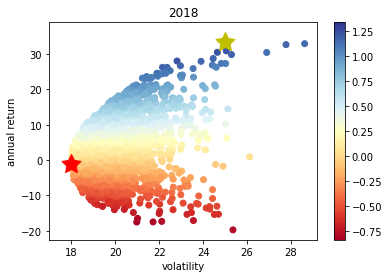

In [5]:
plt.scatter(portfolio_2018['std'],portfolio_2018['ret'],c=portfolio_2018['sharp'],cmap='RdYlBu')
plt.colorbar()
plt.title('2018')
plt.xlabel('volatility')
plt.ylabel('annual return')

max_sharp = portfolio_2018.iloc[portfolio_2018['sharp'].idxmax()]
min_volatility = portfolio_2018.iloc[portfolio_2018['std'].idxmin()]

plt.scatter(max_sharp[1],max_sharp[0],marker=(5,1,0),color='y',s=400)
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='r',s=400)

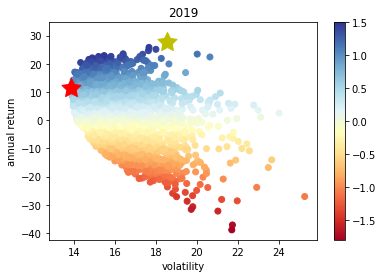

In [6]:
plt.scatter(portfolio_2019['std'],portfolio_2019['ret'],c=portfolio_2019['sharp'],cmap='RdYlBu')
plt.colorbar()
plt.title('2019')
plt.xlabel('volatility')
plt.ylabel('annual return')

max_sharp = portfolio_2019.iloc[portfolio_2019['sharp'].idxmax()]
min_volatility = portfolio_2019.iloc[portfolio_2019['std'].idxmin()]

plt.scatter(max_sharp[1],max_sharp[0],marker=(5,1,0),color='y',s=400)
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='r',s=400)


In [7]:


mean_daily3 = df['daily_return'].mean()
std_daily3 = df['daily_return'].std()
mean_annual3 = mean_daily3*252
std_annual3 = std_daily3*(252**(1/2))
print(f'''Annual returns 
{mean_annual3}''' )
print(f'''Annual volatility 
{std_annual3}''')


weights2 = np.asarray([0.2,0.2,0.2,0.2,0.2])
weights2_transpose = weights2.reshape((5,1))
port_df = close_price_dataframe.pct_change()*100
port_df.set_index(df1.Date,inplace=True)                    #setting Date as index
port_df.fillna(0,inplace = True)

mean_daily2 = port_df.mean().values
cov_daily2 = port_df.cov()

mean_annual2 = (mean_daily2 * weights2 *252).sum

x2 = cov_daily2.values
j2 = 0

volatility2 = (np.dot(weights,np.dot(x2,weights_transpose ) )*252)**(1/2)
print(f'\nThe annual return and volatility of portfolio is {mean_annual2} and {volatility2[0]}')



Annual returns 
-23.895539487039006
Annual volatility 
54.48365489374109

The annual return and volatility of portfolio is <built-in method sum of numpy.ndarray object at 0x7f3dfb746d50> and 18.295173106154913


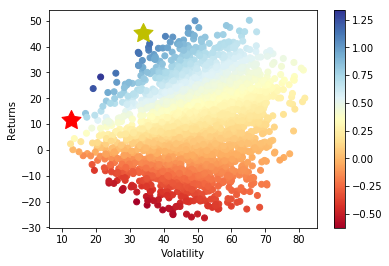

In [8]:
result = np.zeros((num_portfolios,3))

for i in range(num_portfolios):
    weights2 = np.random.random(5)
    weights2 /= np.sum(weights)
    weights2_transpose = weights2.reshape((5,1))
    
    result[i,0] = (mean_daily2 * weights2 *252).sum()
    result[i,1] = np.sqrt(np.dot(weights2,np.dot(x2, weights2_transpose))) * np.sqrt(252)
result[:,2] = result[:,0]/result[:,1]

port_df2 = pd.DataFrame(result,columns=['ret','std','sharp'])


max_sharp2 =port_df2.iloc[port_df2['sharp'].idxmax()]
min_volatility2 = port_df2.iloc[port_df2['std'].idxmin()]

plt.scatter(port_df2['std'],port_df2['ret'],c=port_df2.sharp,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()

plt.scatter(max_sharp2[1],max_sharp2[0],marker=(5,1,0),color='y',s=400)
plt.scatter(min_volatility2[1],min_volatility[0],marker=(5,1,0),color='r',s=400)